In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
29,634 cases (7 day average) as of Fri 08 Oct, +780.1 since Thu 07 Oct
635 hospitalised (7 day average) as of Mon 11 Oct, +8.3 since Sun 10 Oct
74 died (7 day average) as of Fri 08 Oct, -1.6 since Thu 07 Oct


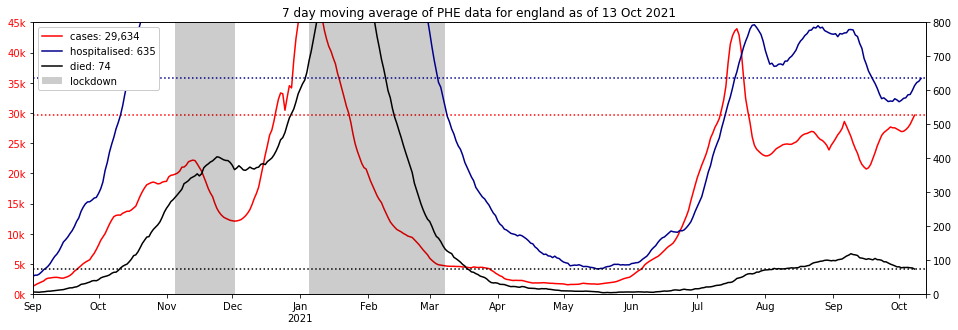

In [3]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=45_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=800)

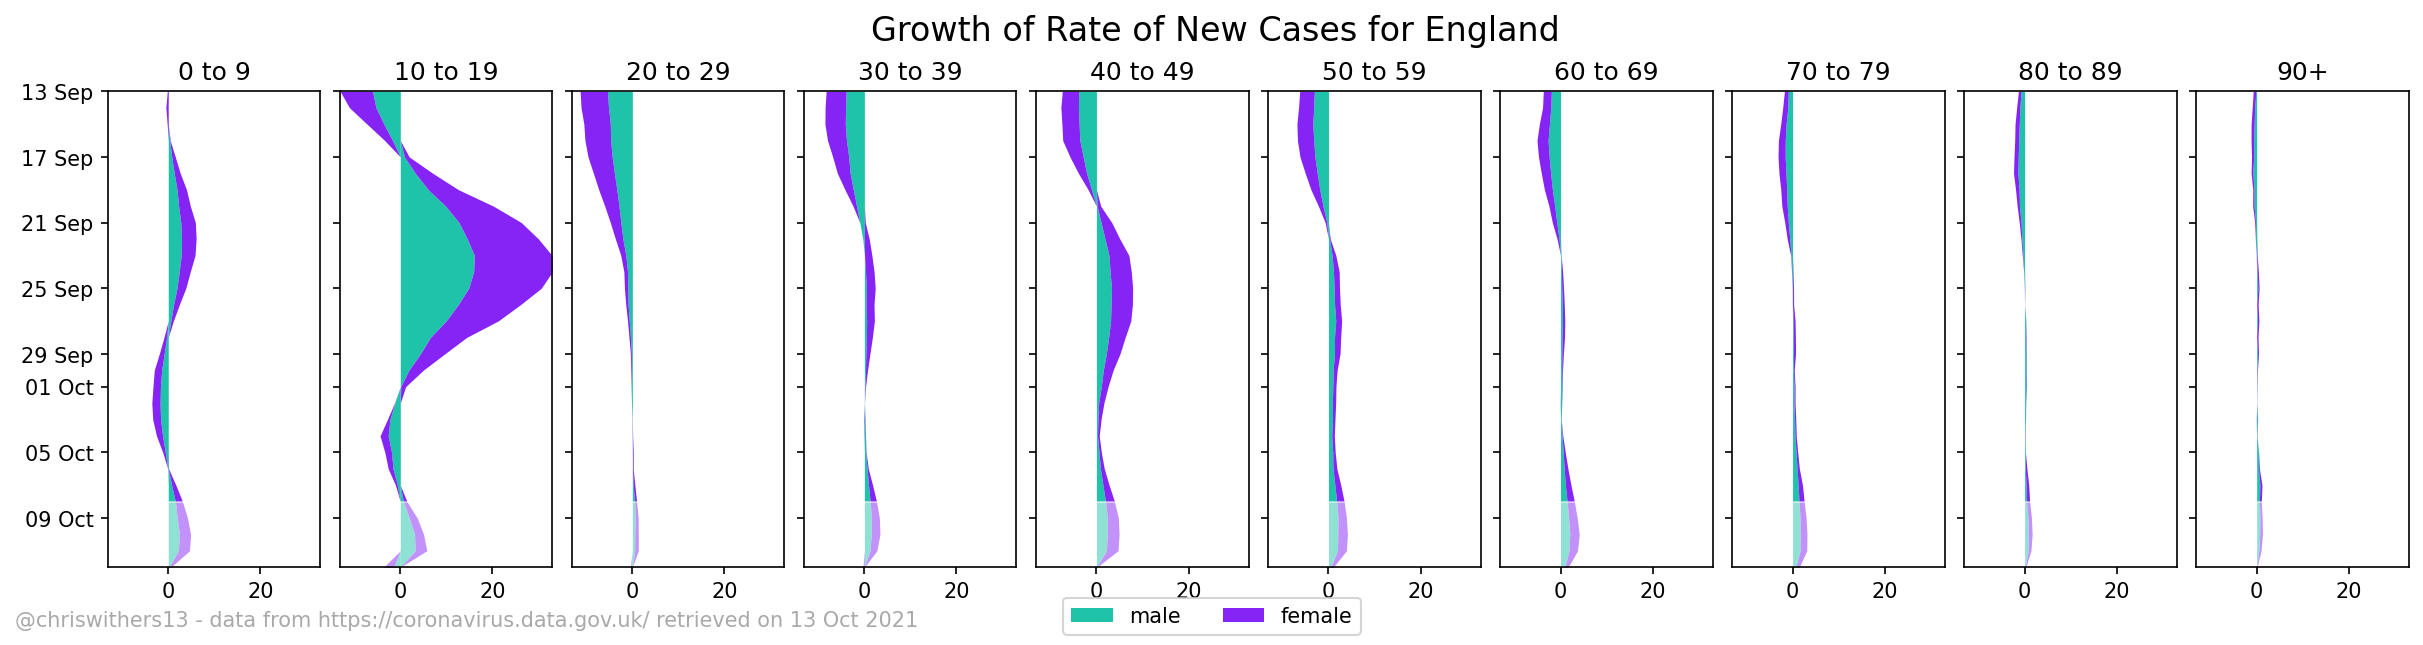

In [4]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

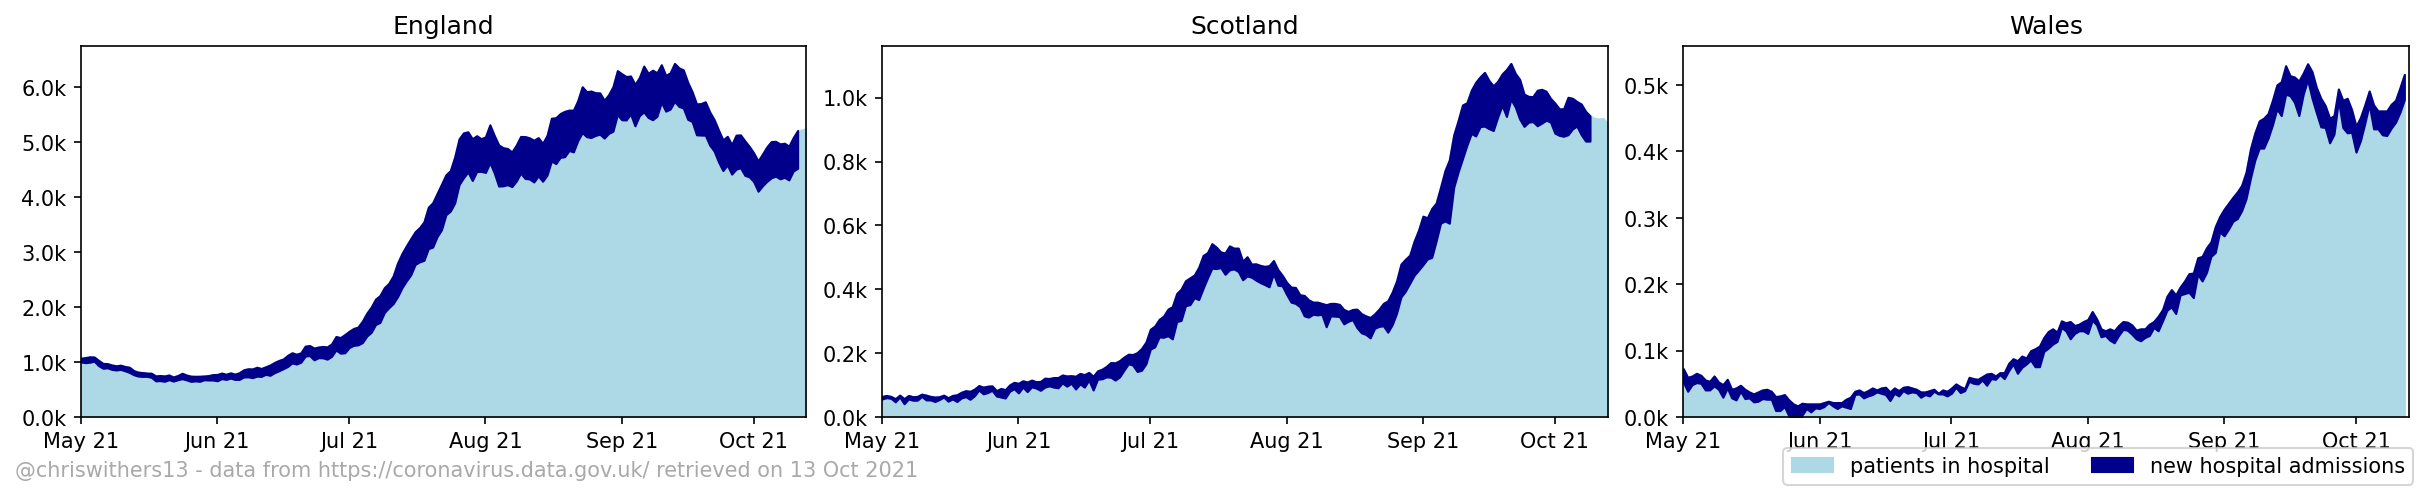

In [5]:
hospital_plot(start='2021-05', figsize=(16,3), figs=(1, 3))

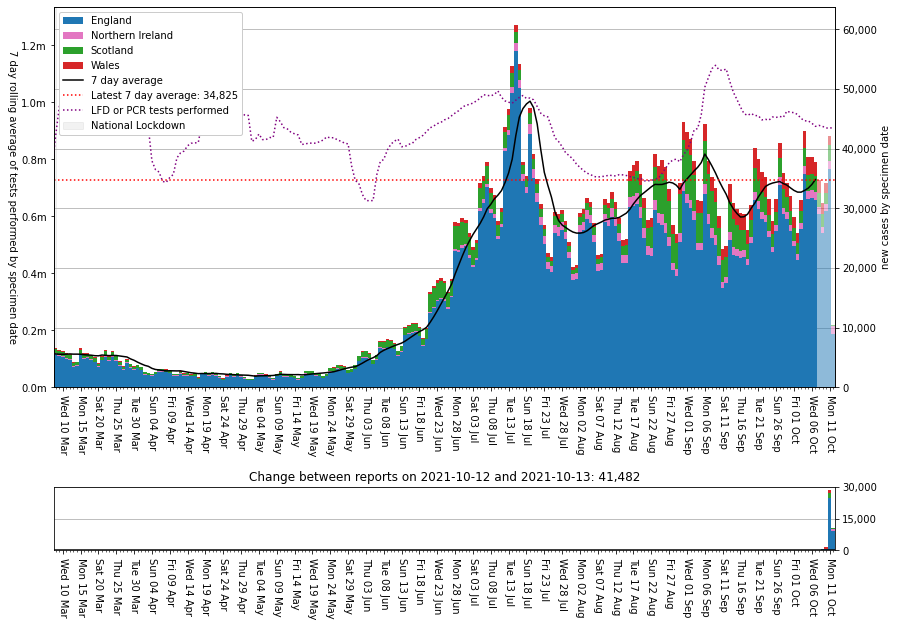

In [6]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b')

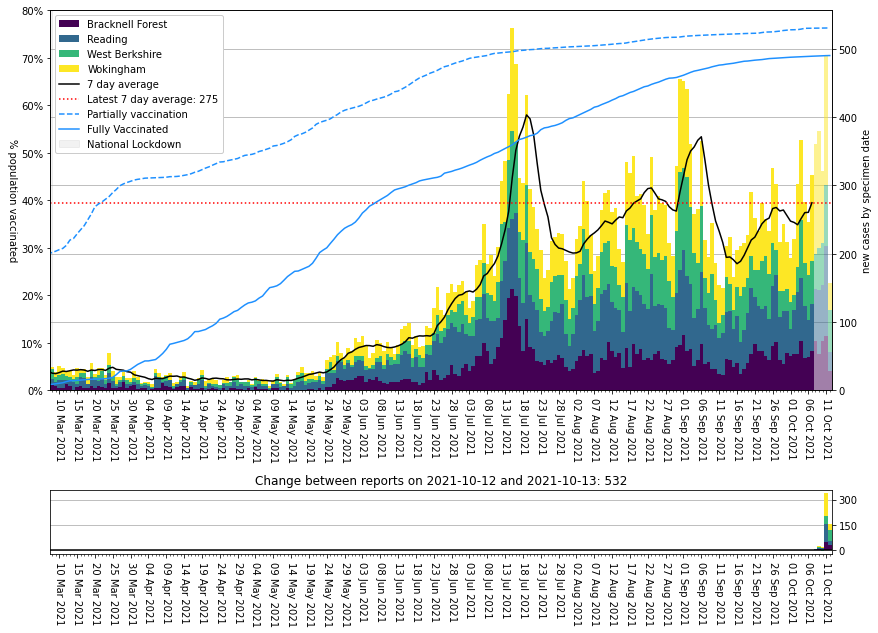

In [7]:
plot_areas(for_date, areas=my_areas, lines=population_vaccinated)

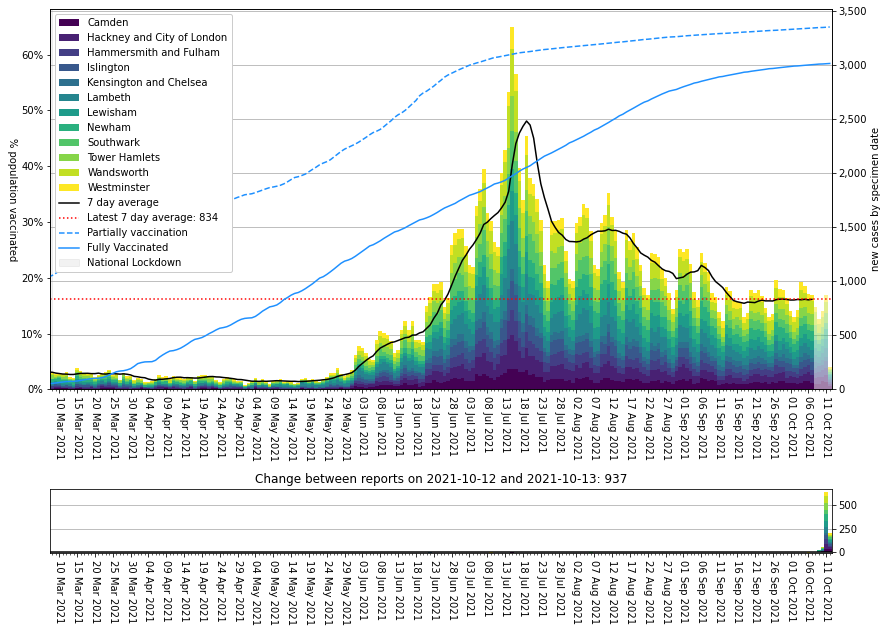

In [8]:
plot_areas(for_date, areas=london_areas, lines=population_vaccinated)

In [9]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [10]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  newCasesBySpecimenDate  \
areaCode                                                                   
E07000156     Wellingborough          705.082364                   562.0   
E07000202            Ipswich          672.689956                   921.0   
E08000009           Trafford          666.514994                  1582.0   
E07000142       West Lindsey          652.262536                   624.0   
E07000171          Bassetlaw          611.277126                   718.0   
E07000089               Hart          608.820166                   591.0   
E07000027  Barrow-in-Furness          601.052961                   403.0   
E07000088            Gosport          599.966996                   509.0   
E07000194          Lichfield          597.579136                   626.0   
E07000151           Daventry          596.858639                   513.0   

          Specimen date  
areaCode                 
E07000156    2021-10-12  
E07000202    2021-10-12  
E08000009    2021-10-12  
E07000142    2021-10-12  
E07000171    2021-10-12  
E07000089    2021-10-12  
E07000027    2021-10-12  
E07000088    2021-10-12  
E07000194    2021-10-12  
E07000151    2021-10-12

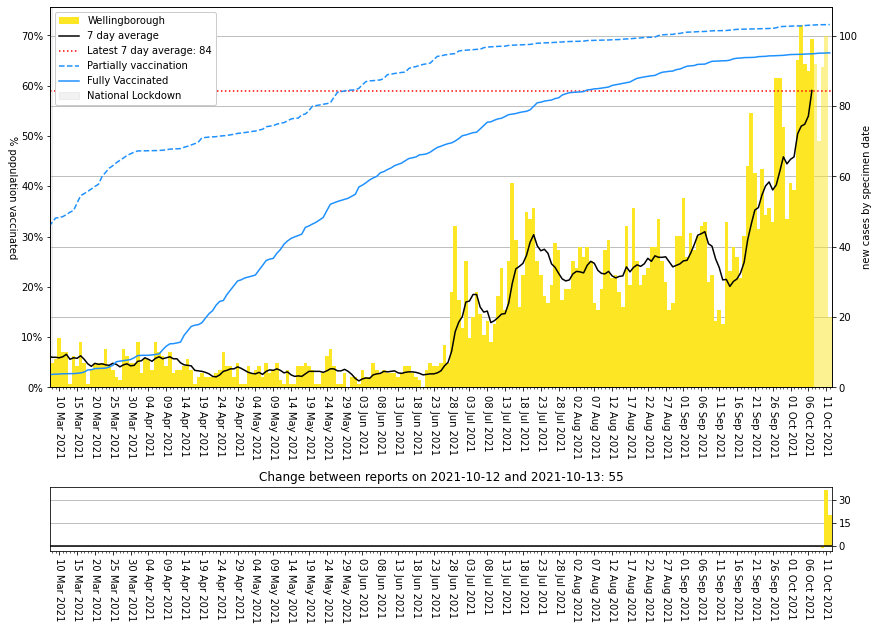

In [11]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [12]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                      
E08000035                         Leeds          407.116533   
E08000025                    Birmingham          239.881032   
E06000052  Cornwall and Isles of Scilly          477.437994   
E06000049                 Cheshire East          571.128095   
E08000032                      Bradford          391.458679   
E06000054                     Wiltshire          413.180167   
W06000015                       Cardiff          559.003333   
E06000047                 County Durham          361.068037   
E08000019                     Sheffield          325.722874   
E08000034                      Kirklees          417.929589   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E08000035                  3229.0    2021-10-12  
E08000025                  2739.0    2021-10-12  
E06000052                  2730.0    2021-10-12  
E06000049                  2194.0    2021-10-12  
E08000032                  2113.0    2021-10-12  
E06000054                  2066.0    2021-10-12  
W06000015                  2051.0    2021-10-12  
E06000047                  1914.0    2021-10-12  
E08000019                  1905.0    2021-10-12  
E08000034                  1838.0    2021-10-12

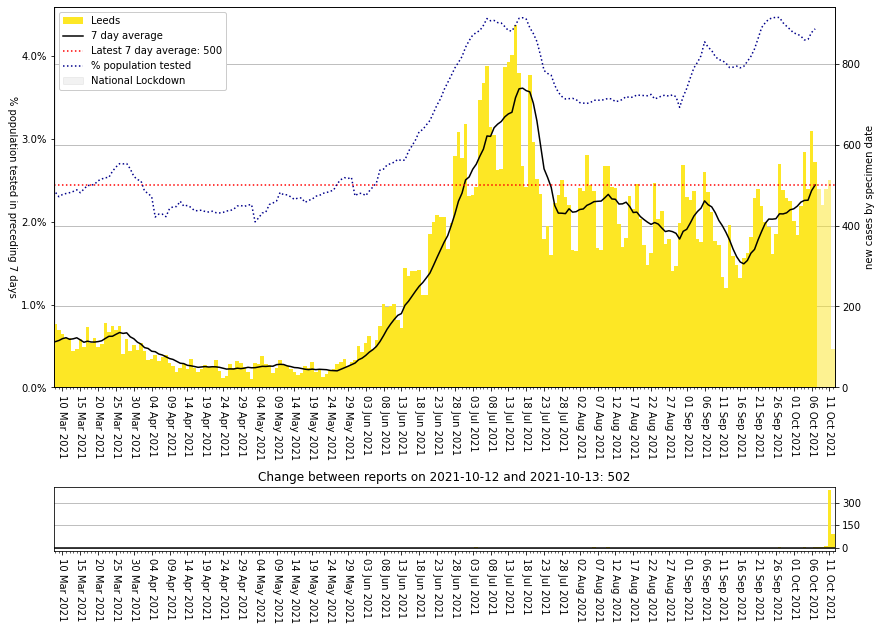

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

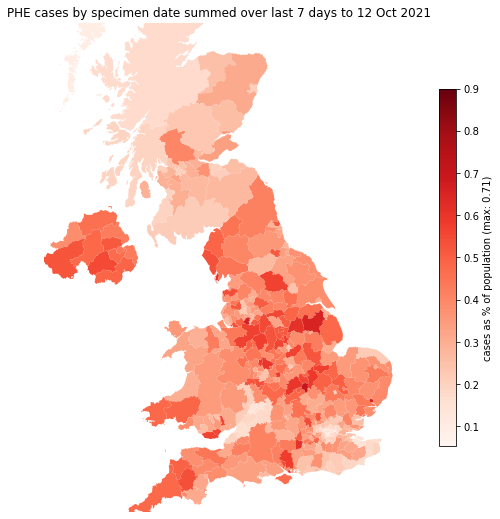

Loading BokehJS ...

In [14]:
summed_maps(for_date, vmax=0.9)

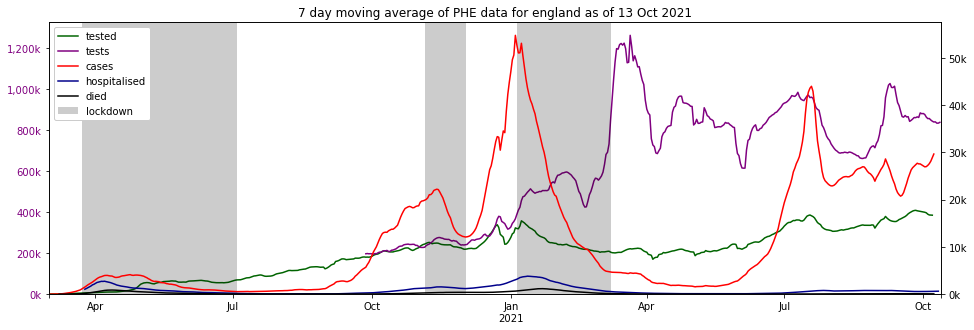

In [15]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

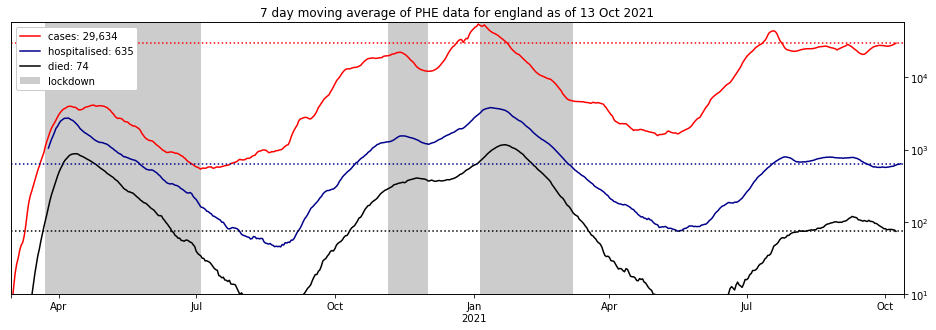

In [16]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

In [17]:
vaccination_changes()

areaName   areaCode        full         any    partial  population  \
0           England  E92000001  37918254.0  41263377.0  3345123.0    56286961   
1  Northern Ireland  N92000002   1221045.0   1316225.0    95180.0     1893667   
2          Scotland  S92000003   3868656.0   4270126.0   401470.0     5463300   
3             Wales  W92000004   2231804.0   2403211.0   171407.0     3152879   

    full_pct  partial_pct   none_pct  
0  67.365964     5.942980  26.691056  
1  64.480450     5.026227  30.493323  
2  70.811707     7.348489  21.839804  
3  70.786224     5.436523  23.777252

'partial: 49,252,939 (73.7%), full: 45,239,759'

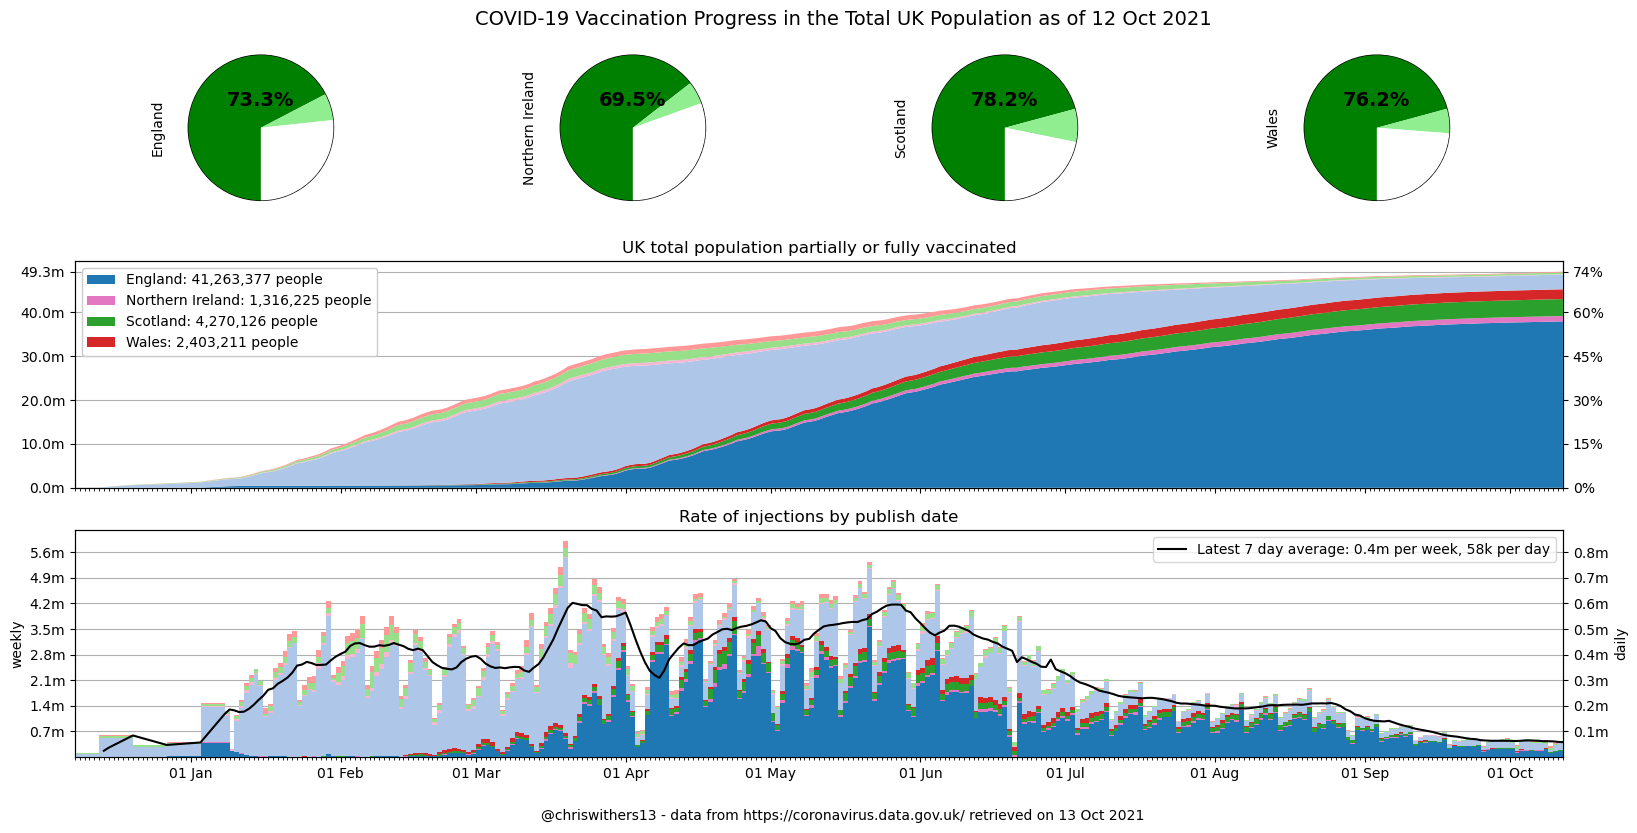

In [18]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")